In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r'C:\Users\rutto\OneDrive\Desktop\mlops-final\data\train.csv')
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
data.shape

(193573, 11)

In [5]:
data.size

2129303

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [8]:
data.drop(labels=['id'],axis=1,inplace=True)

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
#checking duplicated rows
data.duplicated().sum()


np.int64(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [12]:
cat_columns = data.columns[data.dtypes=='object']

In [13]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [14]:
num_columns = data.columns[data.dtypes!='object']

In [15]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [16]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
 6   price   193573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 10.3 MB


In [63]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [17]:
data[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [18]:
data[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [19]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"total count: {len(data[col].value_counts())}")
    print("============================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
total count: 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
total count: 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
total count: 8


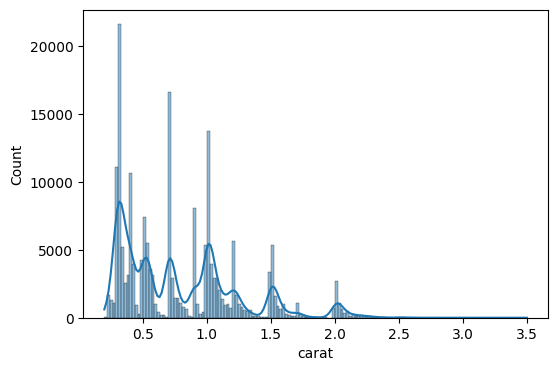

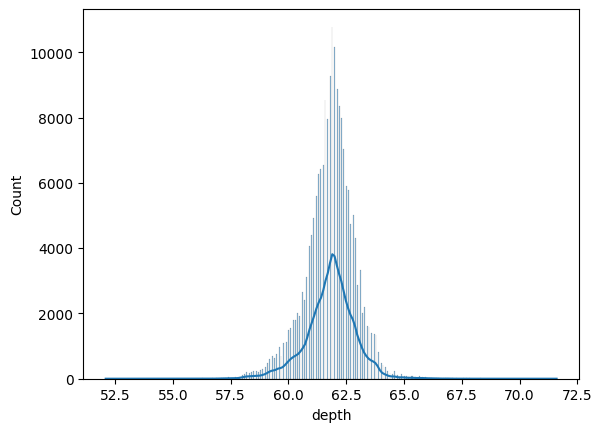

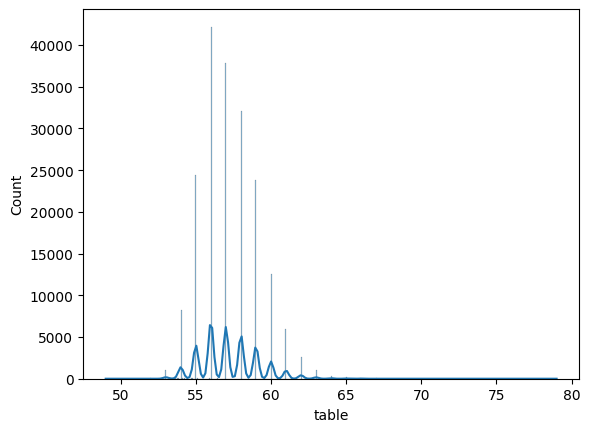

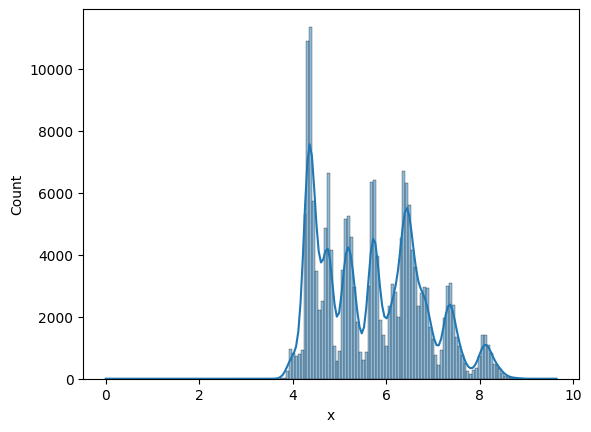

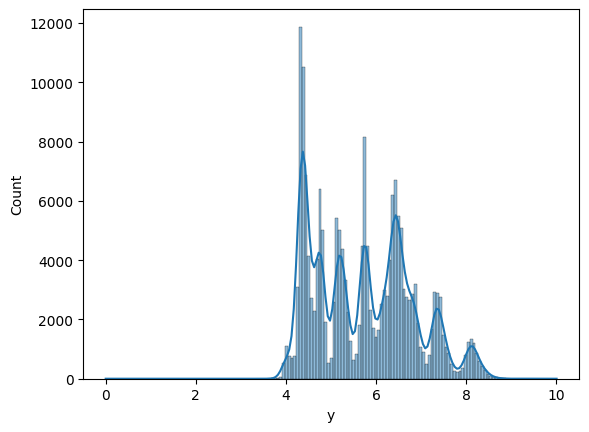

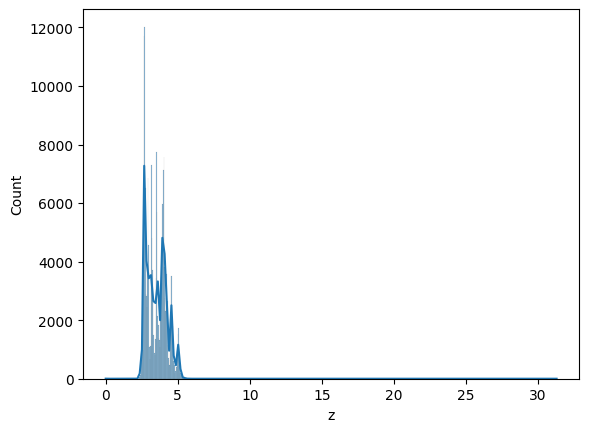

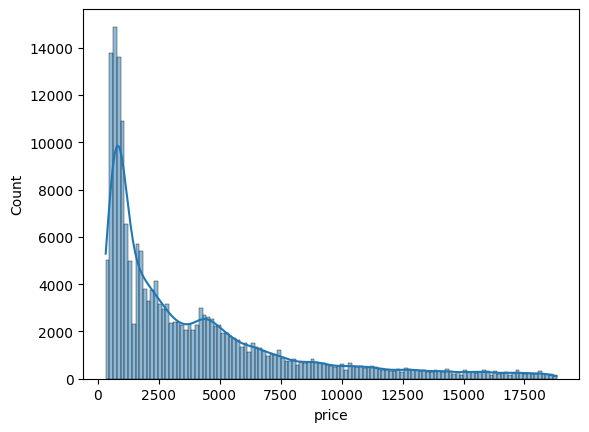

In [20]:
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col, kde=True)
    print("\n")
    plt.show()
    


<Axes: >

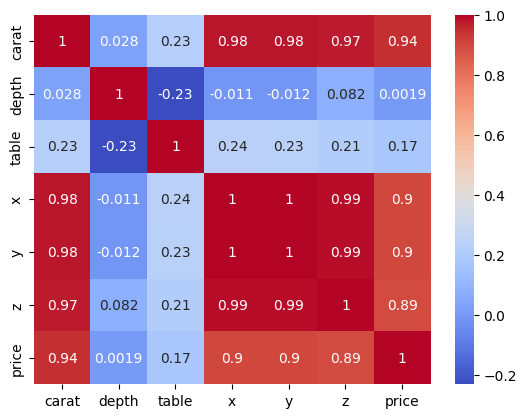

In [21]:
sns.heatmap(data[num_columns].corr(), annot=True, cmap='coolwarm')

In [22]:
#Ordinal encoding 
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [23]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [24]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [25]:

from sklearn.impute import SimpleImputer # HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding


# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [27]:

X = data.drop("price", axis=1)
y = data["price"]

In [28]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [29]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 13.3 MB


In [31]:
cat_cols = X.select_dtypes(include=["object"]).columns



In [32]:
cat_cols

Index([], dtype='object')

In [33]:
num_cols = X.select_dtypes(exclude=["object"]).columns
num_cols

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [34]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [35]:

num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [36]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalEncoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [37]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [38]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [39]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [41]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,5,2,6,60.6,56.0,4.85,4.80,2.93
95284,1.23,3,5,5,59.9,59.0,6.91,7.01,4.19
184777,1.70,4,5,4,62.0,58.0,7.61,7.66,4.74
5419,0.33,5,3,7,61.2,56.0,4.47,4.44,2.73
45466,0.33,3,6,3,62.1,58.0,4.41,4.45,2.75


In [42]:
X_train.shape

(135501, 9)

In [43]:
y_train.head() 

11504      1181
95284      7418
184777    12755
5419       1020
45466       445
Name: price, dtype: int64

In [44]:
X_test.shape

(58072, 9)

In [45]:
cat_cols

Index([], dtype='object')

In [46]:
preprocessor.fit_transform(X_train)

array([[-0.82314374,  0.87410007, -0.93674681, ..., -0.78045073,
        -0.83510329, -0.87602377],
       [ 0.94502267, -1.13764403,  0.91085333, ...,  1.07322572,
         1.16638856,  0.94663261],
       [ 1.9584839 , -0.13177198,  0.91085333, ...,  1.70311578,
         1.75506264,  1.74223659],
       ...,
       [ 0.92345966, -0.13177198,  0.29498662, ...,  0.99223986,
         0.92186241,  1.0478913 ],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.21237535,
        -1.19736425, -1.25212747],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.23937063,
        -1.2154773 , -1.20873089]], shape=(135501, 9))

In [47]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.87410007, -1.55261352, ..., -0.60048215,
        -0.58152061, -0.57224771],
       [ 2.60537405, -1.13764403,  0.29498662, ...,  2.12604196,
         2.19883232,  1.9592195 ],
       [-1.1250258 , -0.13177198, -0.93674681, ..., -1.37434708,
        -1.41472084, -1.46911037],
       ...,
       [-0.82314374,  0.87410007,  0.29498662, ..., -0.83444131,
        -0.86227286, -0.84709272],
       [ 0.90189666, -0.13177198,  1.52672004, ...,  1.04623044,
         0.96714503,  0.93216709],
       [ 0.47063656, -1.13764403, -0.93674681, ...,  0.55131682,
         0.66827973,  0.70071866]], shape=(58072, 9))

In [48]:

preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__cut', 'num_pipeline__color',
       'num_pipeline__clarity', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z'], dtype=object)

In [49]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [50]:
X_train

,num_pipeline__carat,num_pipeline__cut,num_pipeline__color,num_pipeline__clarity,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,-0.823144,0.874100,-0.936747,1.350746,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024
1,0.945023,-1.137644,0.910853,0.684455,-1.777823,0.921902,1.073226,1.166389,0.946633
2,1.958484,-0.131772,0.910853,0.018164,0.165682,0.400636,1.703116,1.755063,1.742237
3,-0.995648,0.874100,-0.320880,2.017037,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334
4,-0.995648,-1.137644,1.526720,-0.648127,0.258230,0.400636,-1.176382,-1.152082,-1.136403
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.137644,-0.936747,-0.648127,-1.500179,1.964434,-0.546492,-0.518125,-0.644575
135497,2.411307,-1.137644,-0.320880,-0.648127,0.443325,2.485700,1.919078,1.872797,1.930288
135498,0.923460,-0.131772,0.294987,0.018164,0.906065,0.400636,0.992240,0.921862,1.047891
135499,-1.038774,-1.137644,0.294987,2.017037,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127


In [51]:
#MODEL Training
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [52]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}


In [53]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [54]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [55]:

for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [56]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [57]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)])

In [58]:
list(models.values())[1]

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [59]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [60]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 1029473.3531156847
MAE: 675.0758270067497
R2 SCORE: 0.9362906819996047


model training performance Lasso()
MSE: 1029533.1769371687
MAE: 676.2402521820168
R2 SCORE: 0.9362869797815189


model training performance Ridge()
MSE: 1029482.8101269014
MAE: 675.107762978137
R2 SCORE: 0.9362900967491627


model training performance ElasticNet()
MSE: 2351198.2209918573
MAE: 1060.945495484605
R2 SCORE: 0.8544952769396246


model training performance RandomForestRegressor()
MSE: 373067.65262872505
MAE: 310.0778951608649
R2 SCORE: 0.9769125780234609


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, int

In [61]:
r2_list

[0.9362906819996047,
 0.9362869797815189,
 0.9362900967491627,
 0.8544952769396246,
 0.9769125780234609,
 0.9786170721054077]

In [62]:
max(r2_list)

0.9786170721054077